In [59]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt 
from plotly import express as px
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [60]:
df = pd.read_csv('gapminder_full.csv')

In [61]:
df.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.80,779.45
1,Afghanistan,1957,9240934,Asia,30.33,820.85
2,Afghanistan,1962,10267083,Asia,32.00,853.10
3,Afghanistan,1967,11537966,Asia,34.02,836.20
4,Afghanistan,1972,13079460,Asia,36.09,739.98


In [62]:
df.sample(5)

,country,year,population,continent,life_exp,gdp_cap
981,Mauritius,1997,1149818,Africa,70.74,"7,425.71"
1203,Peru,1967,12132200,Americas,51.45,"5,788.09"
1037,Mozambique,1977,11127868,Africa,42.49,502.32
994,Mexico,2002,102479927,Americas,74.90,"10,742.44"
1004,Mongolia,1992,2312802,Asia,61.27,"1,785.40"


In [63]:
df.tail()

,country,year,population,continent,life_exp,gdp_cap
1699,Zimbabwe,1987,9216418,Africa,62.35,706.16
1700,Zimbabwe,1992,10704340,Africa,60.38,693.42
1701,Zimbabwe,1997,11404948,Africa,46.81,792.45
1702,Zimbabwe,2002,11926563,Africa,39.99,672.04
1703,Zimbabwe,2007,12311143,Africa,43.49,469.71


In [64]:
df.isnull().sum()

country       0
year          0
population    0
continent     0
life_exp      0
gdp_cap       0
dtype: int64

In [65]:
df.duplicated().sum()

0

## drop shit rows

In [66]:
df = df[df['country'] != 'Israel']

reseting the idexes

In [67]:
df = df.reset_index(drop=True)

 now the data is cleaned

In [68]:
df.tail()

,country,year,population,continent,life_exp,gdp_cap
1687,Zimbabwe,1987,9216418,Africa,62.35,706.16
1688,Zimbabwe,1992,10704340,Africa,60.38,693.42
1689,Zimbabwe,1997,11404948,Africa,46.81,792.45
1690,Zimbabwe,2002,11926563,Africa,39.99,672.04
1691,Zimbabwe,2007,12311143,Africa,43.49,469.71


# Univariate Analysis

In [69]:
df4 = df.groupby('continent' ,  as_index=False)['life_exp'].mean().sort_values(by='life_exp' , ascending=False)
df4

,continent,life_exp
4,Oceania,74.33
3,Europe,71.90
1,Americas,64.66
2,Asia,59.64
0,Africa,48.87


In [70]:
fig = px.bar(data_frame=df4, 
            x='continent',
            y='life_exp',
            color='continent')
fig.show()

In [71]:
px.pie( data_frame=df4,names='continent' , values='life_exp')

In [72]:
df_exp_per_year_allcontinents = df.groupby(['continent', 'year'], as_index=False)['life_exp'].mean()

# Check data types and unique values
print(df_exp_per_year_allcontinents.dtypes)
print(df_exp_per_year_allcontinents['year'].unique())
print(df_exp_per_year_allcontinents['continent'].unique())

df_exp_per_year_allcontinents

continent     object
year           int64
life_exp     float64
dtype: object
[1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007]
['Africa' 'Americas' 'Asia' 'Europe' 'Oceania']


,continent,year,life_exp
0,Africa,1952,39.14
1,Africa,1957,41.27
2,Africa,1962,43.32
3,Africa,1967,45.33
4,Africa,1972,47.45
5,Africa,1977,49.58
6,Africa,1982,51.59
7,Africa,1987,53.34
8,Africa,1992,53.63
9,Africa,1997,53.60


In [73]:
fig = px.scatter(df_exp_per_year_allcontinents,
                x='year',
                y='life_exp',
                color='continent',
                size='life_exp',
                animation_frame='year',
                title='Average Life Expectancy by Continent Over Time')
fig.update_layout(xaxis=dict(range=[1950, 2010]), yaxis=dict(range=[30, 80]))
fig.show()

In [74]:
df_exp_per_year_africa =  df[df['continent'] == 'Africa'].groupby('year', as_index=False)['life_exp'].mean()
df_exp_per_year_africa

,year,life_exp
0,1952,39.14
1,1957,41.27
2,1962,43.32
3,1967,45.33
4,1972,47.45
5,1977,49.58
6,1982,51.59
7,1987,53.34
8,1992,53.63
9,1997,53.60


In [75]:
px.line(data_frame=df_exp_per_year_africa, x='year', y='life_exp')
#plt.title('Average Life Expectancy for Africa by Year')
#plt.xlabel('Year')
#plt.ylabel('Life Expectancy')
#plt.xlim(df_exp_per_year_africa['year'].min(), df_exp_per_year_africa['year'].max())
#plt.ylim(df_exp_per_year_africa['life_exp'].min(), df_exp_per_year_africa['life_exp'].max())
#plt.tight_layout()
#plt.show()

for Europe

In [76]:
df_exp_per_year_europe =  df[df['continent'] == 'Europe'].groupby('year', as_index=False)['life_exp'].mean()
df_exp_per_year_europe

,year,life_exp
0,1952,64.41
1,1957,66.70
2,1962,68.54
3,1967,69.74
4,1972,70.78
5,1977,71.94
6,1982,72.81
7,1987,73.64
8,1992,74.44
9,1997,75.51


In [77]:
px.line(data_frame=df_exp_per_year_europe, x='year', y='life_exp')
#plt.title('Total Life Expectancy for Europe by Year')
#plt.xlabel('Year')
#plt.ylabel('Life Expectancy')
#plt.xlim(df_exp_per_year_europe['year'].min(), df_exp_per_year_europe['year'].max())
#plt.ylim(df_exp_per_year_europe['life_exp'].min(), df_exp_per_year_europe['life_exp'].max())
#plt.tight_layout()
#plt.show()

In [78]:
df_exp_per_year_asia = df[df['continent'] == 'Asia'].groupby('year' ,as_index=False)['life_exp'].mean()
df_exp_per_year_asia

,year,life_exp
0,1952,45.72
1,1957,48.74
2,1962,51.01
3,1967,54.16
4,1972,56.87
5,1977,59.19
6,1982,62.25
7,1987,64.52
8,1992,66.21
9,1997,67.70


In [79]:
px.line(data_frame=df_exp_per_year_asia , x='year' , y='life_exp')

In [80]:
df_exp_per_year_americas = df[df['continent'] == 'Americas'].groupby('year' , as_index=False)['life_exp'].mean()
df_exp_per_year_americas

,year,life_exp
0,1952,53.28
1,1957,55.96
2,1962,58.40
3,1967,60.41
4,1972,62.39
5,1977,64.39
6,1982,66.23
7,1987,68.09
8,1992,69.57
9,1997,71.15


In [81]:
px.line(data_frame=df_exp_per_year_americas , x='year' , y='life_exp')

In [82]:
df_exp_per_year_oceania = df[df['continent'] == 'Oceania'].groupby('year' , as_index=False)['life_exp'].mean()
df_exp_per_year_oceania

,year,life_exp
0,1952,69.25
1,1957,70.30
2,1962,71.09
3,1967,71.31
4,1972,71.91
5,1977,72.85
6,1982,74.29
7,1987,75.32
8,1992,76.94
9,1997,78.19


In [83]:
px.line(data_frame=df_exp_per_year_oceania , x='year' , y='life_exp')

### Visualising the average of life exp for each country

In [84]:
avg_life_exp = df.groupby('country' , as_index=False)['life_exp'].mean()
avg_life_exp

,country,life_exp
0,Afghanistan,37.48
1,Albania,68.43
2,Algeria,59.03
3,Angola,37.88
4,Argentina,69.06
5,Australia,74.66
6,Austria,73.10
7,Bahrain,65.61
8,Bangladesh,49.83
9,Belgium,73.64


In [85]:
fig = px.choropleth(avg_life_exp, 
                    locations='country',
                    locationmode='country names',
                    color='life_exp',
                    color_continuous_scale='Viridis',
                    title='Average Life Expectancy by Country')
fig.show()

gdp_cap with contintents and countries and it`s relation with life_exp

In [86]:
df5 = df.groupby('continent' ,  as_index=False)['gdp_cap'].mean().sort_values(by='gdp_cap' , ascending=False)
df5

,continent,gdp_cap
4,Oceania,"18,621.61"
3,Europe,"14,469.48"
2,Asia,"7,706.56"
1,Americas,"7,136.11"
0,Africa,"2,193.75"


In [87]:
px.bar(data_frame=df5 , x='continent' ,y='gdp_cap' , color='continent')

In [88]:
px.pie(data_frame=df5 , names='continent' , values='gdp_cap')

In [89]:
gpd_cap_average_per_year_continent = df.groupby(['continent' , 'year'] , as_index=False)['gdp_cap'].mean()
gpd_cap_average_per_year_continent

,continent,year,gdp_cap
0,Africa,1952,"1,252.57"
1,Africa,1957,"1,385.24"
2,Africa,1962,"1,598.08"
3,Africa,1967,"2,050.36"
4,Africa,1972,"2,339.62"
5,Africa,1977,"2,585.94"
6,Africa,1982,"2,481.59"
7,Africa,1987,"2,282.67"
8,Africa,1992,"2,281.81"
9,Africa,1997,"2,378.76"


In [90]:
fig = px.scatter(gpd_cap_average_per_year_continent,
                x='year',
                y='gdp_cap',
                color='continent',
                size='gdp_cap',
                animation_frame='year',
                title='Average GDP by Continent Over Time')
fig.update_layout(xaxis=dict(range=[1950, 2010]))
fig.show()

In [91]:
gdp_cap_average_country = df.groupby('country' , as_index=False)['gdp_cap'].mean().sort_values(by='gdp_cap',ascending=False)
gdp_cap_average_country

,country,gdp_cap
70,Kuwait,"65,332.91"
122,Switzerland,"27,074.33"
94,Norway,"26,747.31"
133,United States,"26,261.15"
20,Canada,"22,410.75"
89,Netherlands,"21,748.85"
34,Denmark,"21,671.82"
47,Germany,"20,556.68"
57,Iceland,"20,531.42"
6,Austria,"20,411.92"


In [92]:
fig1= px.choropleth(data_frame=gdp_cap_average_country,
                locations='country',
                locationmode='country names',
                color='gdp_cap',
                title='Average GDP for each Country from 1952 to 2007',
                )
fig1.show()

gdp average for each country in 2007

In [93]:
df_2007 = df[df['year'] == 2007]
gdp_cap_2007 = df_2007.groupby('country', as_index=False)['gdp_cap'].mean().sort_values(by='gdp_cap' , ascending=False)
gdp_cap_2007

,country,gdp_cap
94,Norway,"49,357.19"
70,Kuwait,"47,306.99"
112,Singapore,"47,143.18"
133,United States,"42,951.65"
62,Ireland,"40,676.00"
55,"Hong Kong, China","39,724.98"
122,Switzerland,"37,506.42"
89,Netherlands,"36,797.93"
20,Canada,"36,319.24"
57,Iceland,"36,180.79"


In [94]:
fig1= px.choropleth(data_frame=gdp_cap_2007,
            locations='country',
                    locationmode='country names',
                    color='gdp_cap',
                    color_continuous_scale='YlOrRd',
                    title='Average GDP for each Country in 2007',
                    )
fig1.show()

In [95]:
df6 = df[['life_exp' , 'gdp_cap' , 'population']]
df7= df6.corr()

<Axes: >

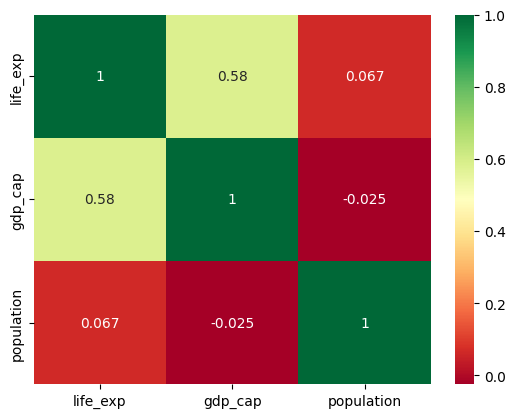

In [96]:
sns.heatmap(data=df7 , annot=True,cmap="RdYlGn")

population for Continents and Countries

In [97]:
population_for_countinents = df.groupby(['continent' , 'year'] , as_index=False)['population'].sum().sort_values(by='year' , ascending=True)

population_for_countinents

,continent,year,population
0,Africa,1952,237640501
24,Asia,1952,1393736437
36,Europe,1952,418120846
12,Americas,1952,345152446
48,Oceania,1952,10686006
37,Europe,1957,437890351
25,Asia,1957,1560836198
49,Oceania,1957,11941976
13,Americas,1957,386953916
1,Africa,1957,264837738


In [98]:
px.bar(data_frame=population_for_countinents , x='continent' , y='population' , color='continent' ,animation_frame='year')

In [99]:
px.pie(data_frame=population_for_countinents , names='continent' , values='population')

In [100]:
fig = px.line(data_frame=population_for_countinents, 
            x='year',
            y='population',
            color='continent',
            title=' Population for Each Continent Over Time')
fig.show()

grouping all informations foreach country from 1952 to 2007

In [101]:
df_grouping = df.groupby('country' , as_index=False)[[ 'population','life_exp' , 'gdp_cap']].mean()
df_grouping

,country,population,life_exp,gdp_cap
0,Afghanistan,"15,823,715.42",37.48,802.67
1,Albania,"2,580,249.17",68.43,"3,255.37"
2,Algeria,"19,875,406.17",59.03,"4,426.03"
3,Angola,"7,309,390.08",37.88,"3,607.10"
4,Argentina,"28,602,239.92",69.06,"8,955.55"
5,Australia,"14,649,312.50",74.66,"19,980.60"
6,Austria,"7,583,298.42",73.10,"20,411.92"
7,Bahrain,"373,913.17",65.61,"18,077.66"
8,Bangladesh,"90,755,395.33",49.83,817.56
9,Belgium,"9,725,118.67",73.64,"19,900.76"


change population columns to be Integer values

In [102]:
df_grouping['population'].dtype

dtype('float64')

In [103]:
df_grouping['population'] = df_grouping['population'].astype(int)

In [104]:
df_grouping

,country,population,life_exp,gdp_cap
0,Afghanistan,15823715,37.48,802.67
1,Albania,2580249,68.43,"3,255.37"
2,Algeria,19875406,59.03,"4,426.03"
3,Angola,7309390,37.88,"3,607.10"
4,Argentina,28602239,69.06,"8,955.55"
5,Australia,14649312,74.66,"19,980.60"
6,Austria,7583298,73.10,"20,411.92"
7,Bahrain,373913,65.61,"18,077.66"
8,Bangladesh,90755395,49.83,817.56
9,Belgium,9725118,73.64,"19,900.76"


In [105]:
fig3 = px.scatter(df_grouping, 
                x='gdp_cap',
                y='life_exp',
                size='population',
                color='country',
                title='Relationship between GDP per Capita, Life Expectancy, and Population')

fig3.show()